## Imports

In [237]:
# import libraries
%pip install numpy pandas mayplotlib seaborn wordcloud matplotlib nltk plotly
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re
import plotly.express as px

%cd /home/jupyter/mnt/s3/databucket

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
/home/jupyter/mnt/s3/databucket


## Initial Analysis Train.csv

In [238]:
df = pd.read_csv('train.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)  # redundant index column
df.head()

,sentence,1category,2category,sentiment
0,При этом всегда получал качественные услуги.,Communication,NaN,+
1,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−
2,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−
3,Отвратительное отношение к клиентам.,Communication,NaN,−
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+


In [239]:
df.shape

(19361, 4)

In [240]:
# Check each data type of columns and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 4 columns):
sentence     19361 non-null object
1category    19361 non-null object
2category    999 non-null object
sentiment    19361 non-null object
dtypes: object(4)
memory usage: 605.2+ KB


## Duplicate Analysis

In [241]:
#unique values for each column
for column in df.columns:
    print(f'Column {column}: {df[column].unique()}')

Column sentence: ['При этом всегда получал качественные услуги.'
 'Не вижу, за что хотя бы 2 поставить, сервис на 1!'
 'Вот так "Мой любимый" банк МКБ меня обманул.' ...
 'И иду на встречу, готов еще заплатить % за месяц, сумму сам не высчитывал, мне перезвонили, проверили, что это действительно я, сообщили сумму к оплате досрочного погашения, сказали оплатить до 12-го, я все внес уже 9-го.'
 'У меня положительное отношение к этому банку.'
 'В общей сложности через 30 мин.мы ушли из банка с приятными впечатлениями.']
Column 1category: ['Communication' '?' 'Quality' 'Price' 'Safety']
Column 2category: [nan 'Quality' 'Communication' 'Price' 'Safety']
Column sentiment: ['+' '−' '?']


In [242]:
df.describe()  # very small value for unique values of sentence, 2category is almost empty thus strong disbalance of classes

,sentence,1category,2category,sentiment
count,19361,19361,999,19361
unique,7166,5,4,3
top,Вот это клиентоориентированность!,Communication,Communication,−
freq,6,7193,474,10192


df.sort_values(by=['sentence']).tail(20)

In [243]:
# check whether non-unique values have the same other values
df.drop_duplicates(keep='last', inplace=True)
df.shape # off by 5 thousands

(12897, 4)

## Visualisation

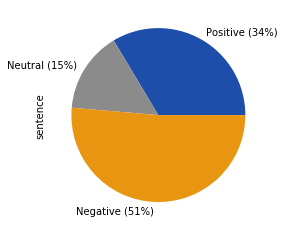

In [246]:
# check balance of classes

df.groupby('sentiment').count()['sentence'].plot(kind='pie', labels=['Positive (34%)', 'Neutral (15%)', 'Negative (51%)'], colors = ['#1C4EAA', '#8B8B8C', '#E89611' ])
plt.savefig('pie.png')
plt.show()

In [ ]:
# Construct Cloud of Words
nltk.download('stopwords')
from nltk.corpus import stopwords

# let's visualise the world cloud
# iterate through the csv file
comment_words = ''
stopwords = stopwords.words('russian')

for val in df.sentence:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 3200, height = 3200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construct unigrams for each class
nltk.download('stopwords')
from nltk.corpus import stopwords

# let's visualise the world cloud
# iterate through the csv file
comment_words_pos = ''
comment_words_neg = ''
comment_words_ntr = ''
stopwords = stopwords.words('russian')
stopwords += ['-', ',', 'банк,', 'банка,', 'банка', 'которые', 'сотрудников', 'банке', 'карты', 'сотрудник', 'всем', 'отделения', 'банка.', 'и,',
             'колеи,', 'работой,', 'здоровьем,', 'проблема.', '–']

for i in range(len(df)):
    # typecaste each val to string
    val = str(df.iloc[i, 0]).lower()
 
    # split the value
    tokens = val.split()
    
    if df.iloc[i, 3] == '−':
        comment_words_neg += " ".join(tokens)+" "
    elif df.iloc[i, 3] == '+':
        comment_words_pos += " ".join(tokens)+" "
    else:
        comment_words_ntr += " ".join(tokens)+" "

        
N_words = 10
fontsize = 10
com_wor_neg_df = pd.DataFrame(comment_words_neg.split())
com_wor_neg_df = com_wor_neg_df[~com_wor_neg_df.iloc[:,0].isin(stopwords)]
com_wor_neg_df = com_wor_neg_df.iloc[:,0].value_counts()[:N_words]

com_wor_ntr_df = pd.DataFrame(comment_words_ntr.split())
com_wor_ntr_df = com_wor_ntr_df[~com_wor_ntr_df.iloc[:,0].isin(stopwords)]
com_wor_ntr_df = com_wor_ntr_df.iloc[:,0].value_counts()[:N_words]

com_wor_pos_df = pd.DataFrame(comment_words_pos.split())
com_wor_pos_df = com_wor_pos_df[~com_wor_pos_df.iloc[:,0].isin(stopwords)]
com_wor_pos_df = com_wor_pos_df.iloc[:,0].value_counts()[:N_words]


fig, axes = plt.subplots(ncols=3, figsize=(12, 7), dpi=120)
plt.tight_layout()

sns.barplot(y=com_wor_neg_df.index, x=com_wor_neg_df, color='#E89611',  ax=axes[0])
sns.barplot(y=com_wor_ntr_df.index, x=com_wor_ntr_df, color='#8B8B8C',  ax=axes[1])
sns.barplot(y=com_wor_pos_df.index, x=com_wor_pos_df, color='#1C4EAA',  ax=axes[2])

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=fontsize)
    axes[i].tick_params(axis='y', labelsize=fontsize)

axes[0].set_title(f'Top {N_words} most common unigrams in Negative Sentiment', fontsize=fontsize)
axes[1].set_title(f'Top {N_words} most common unigrams in Neutral Sentiment', fontsize=fontsize)
axes[2].set_title(f'Top {N_words} most common unigrams in Positive Sentiment', fontsize=fontsize)

plt.savefig('Unigram Train.png')
plt.show();

In [ ]:
# compute unigrmas overall
stopwords += ['-', ',', 'банк,', 'банка,', 'банка', 'которые', 'сотрудников', 'банке', 'карты', 'сотрудник', 'всем', 'отделения', 'банка.']
com_wor_df = pd.DataFrame(comment_words.lower().split())
com_wor_df = com_wor_df[~com_wor_df.iloc[:,0].isin(stopwords)]
com_wor_df = com_wor_df.iloc[:,0].value_counts()
fig = plt.figure(figsize=(8, 13), dpi=100)
com_wor_df = com_wor_df[:20]
sns.barplot(y=com_wor_df.index, x=com_wor_df)
plt.title('Individual Sentences Unigram Top-20')
plt.xlabel("Word Count")
plt.savefig('Unigram Train.png')
plt.show();

## Initial Analysis Banki.csv

In [ ]:
banki_csv = pd.read_csv('banki.csv')
banki_csv.head(10)

In [ ]:
banki_csv.describe()

In [ ]:
banki_csv.info()

In [ ]:
# check whether all sentences from banki.ru
search = 'https://www.banki.ru'
banki_csv['url_bank_count'] = banki_csv['url_bank'].str.count(search, re.I)
print(banki_csv['url_bank_count'].sum() == len(banki_csv))  # cehck whether all strings start from search
banki_csv.drop(columns = ['url_bank_count'], inplace=True)

In [ ]:
# so we can provide further info with data erichment
banki_csv['date'] = pd.to_datetime(banki_csv['date'])
banki_csv['date'] = banki_csv['date'].dt.date  # get riod of time in timestamp
banki_csv

In [ ]:
# find info of growth in number of comments
fig = px.line(banki_csv['date'].value_counts().sort_index())
fig.show();